<a href="https://colab.research.google.com/github/balaobireddy408/OpenAI-Training/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Crop Recommendation Based on Soil

# 1.Importing Libraries and Loading dataset

In [170]:
import pandas as pd  #for handling the data. It contains n number of function for data handling
import numpy as np   #for creating and handling the array
import matplotlib.pyplot as plt  #for visualizing the data. It also hulpfull in finding patterns in the dataset.
import seaborn as sns   #is a library for making statistical graphics in Python
from sklearn import model_selection #It provides a selection of efficient tools for machine learning and statistical modeling including
                                    #classification, regression, clustering and dimensionality reduction via a consistence interface in Python
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
#Loading and reading the data
#This is dataset which is used to recommend the crop for the suitable soil.
#This will be very useful in crop production (Agriculture) without looses based on soli ph, rainfall, humadity and other chemical components present in the soil.

In [7]:
df = pd.read_csv('/content/sample_data/crop_recommendation.csv')


In [8]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [9]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [10]:
df.size

17600

In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [16]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [15]:
#2.EDA-Exploratory data analysis

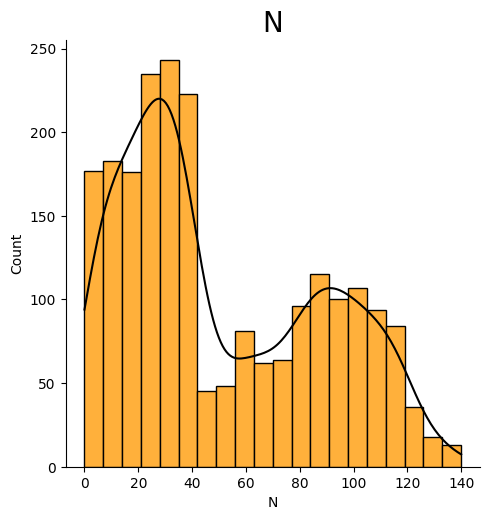

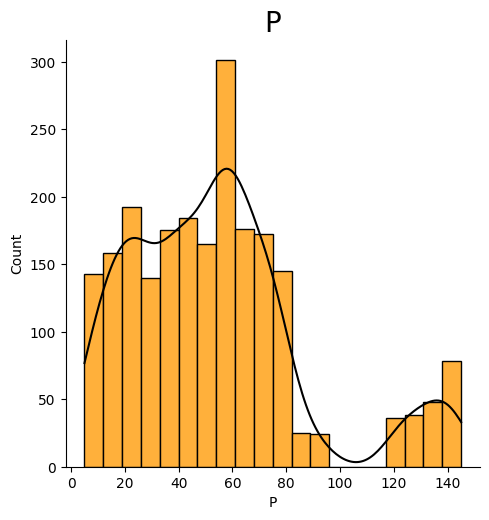

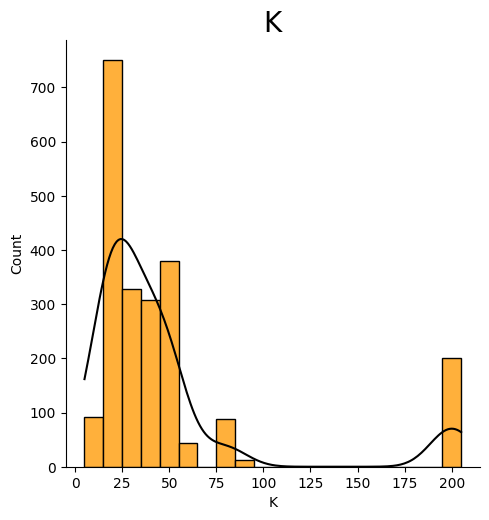

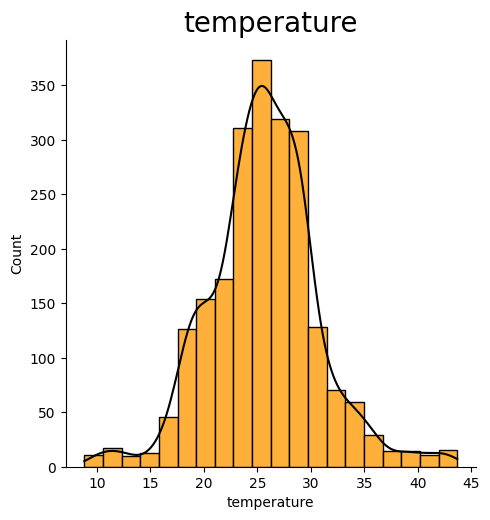

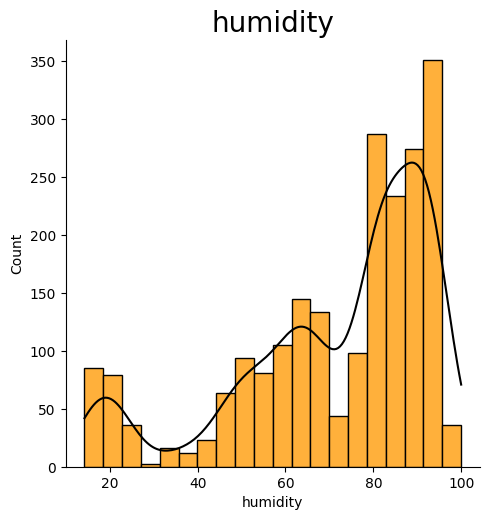

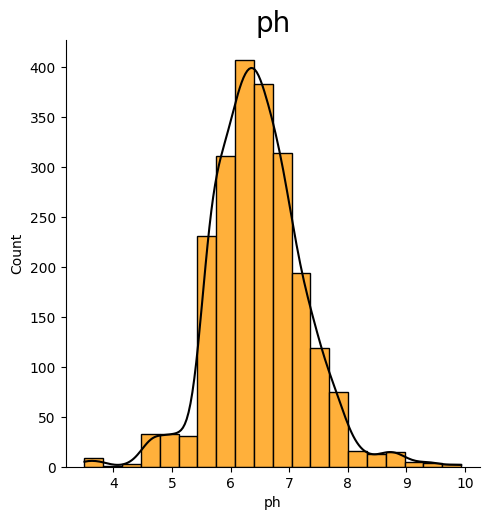

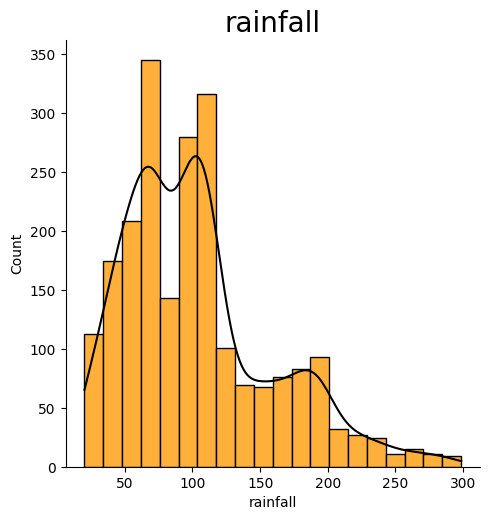

In [17]:
data1 = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in data1.columns:
    sns.displot(x=data1[i], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
    plt.title(i, size=20)
    plt.show()

In [18]:
data= df.iloc[:, :-1]
print(data)


        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


<Axes: >

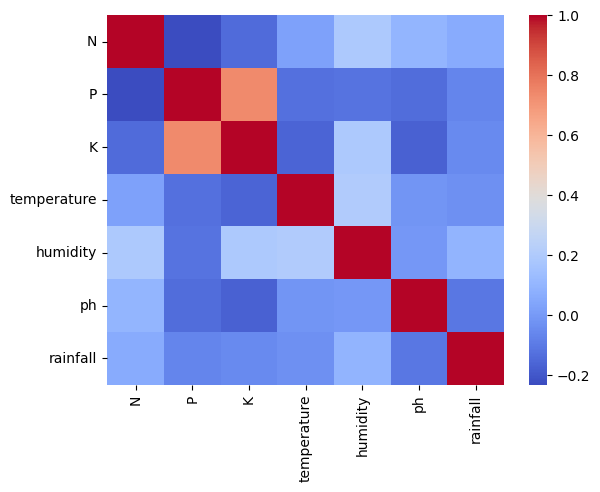

In [19]:
sns.heatmap(data.corr(),cmap = 'coolwarm')

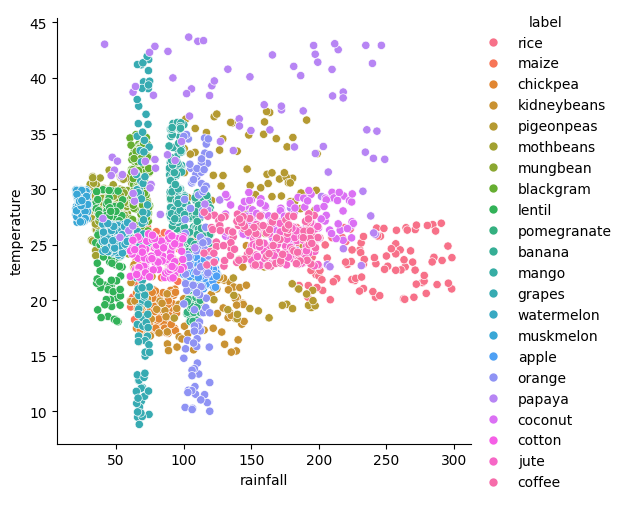

In [20]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

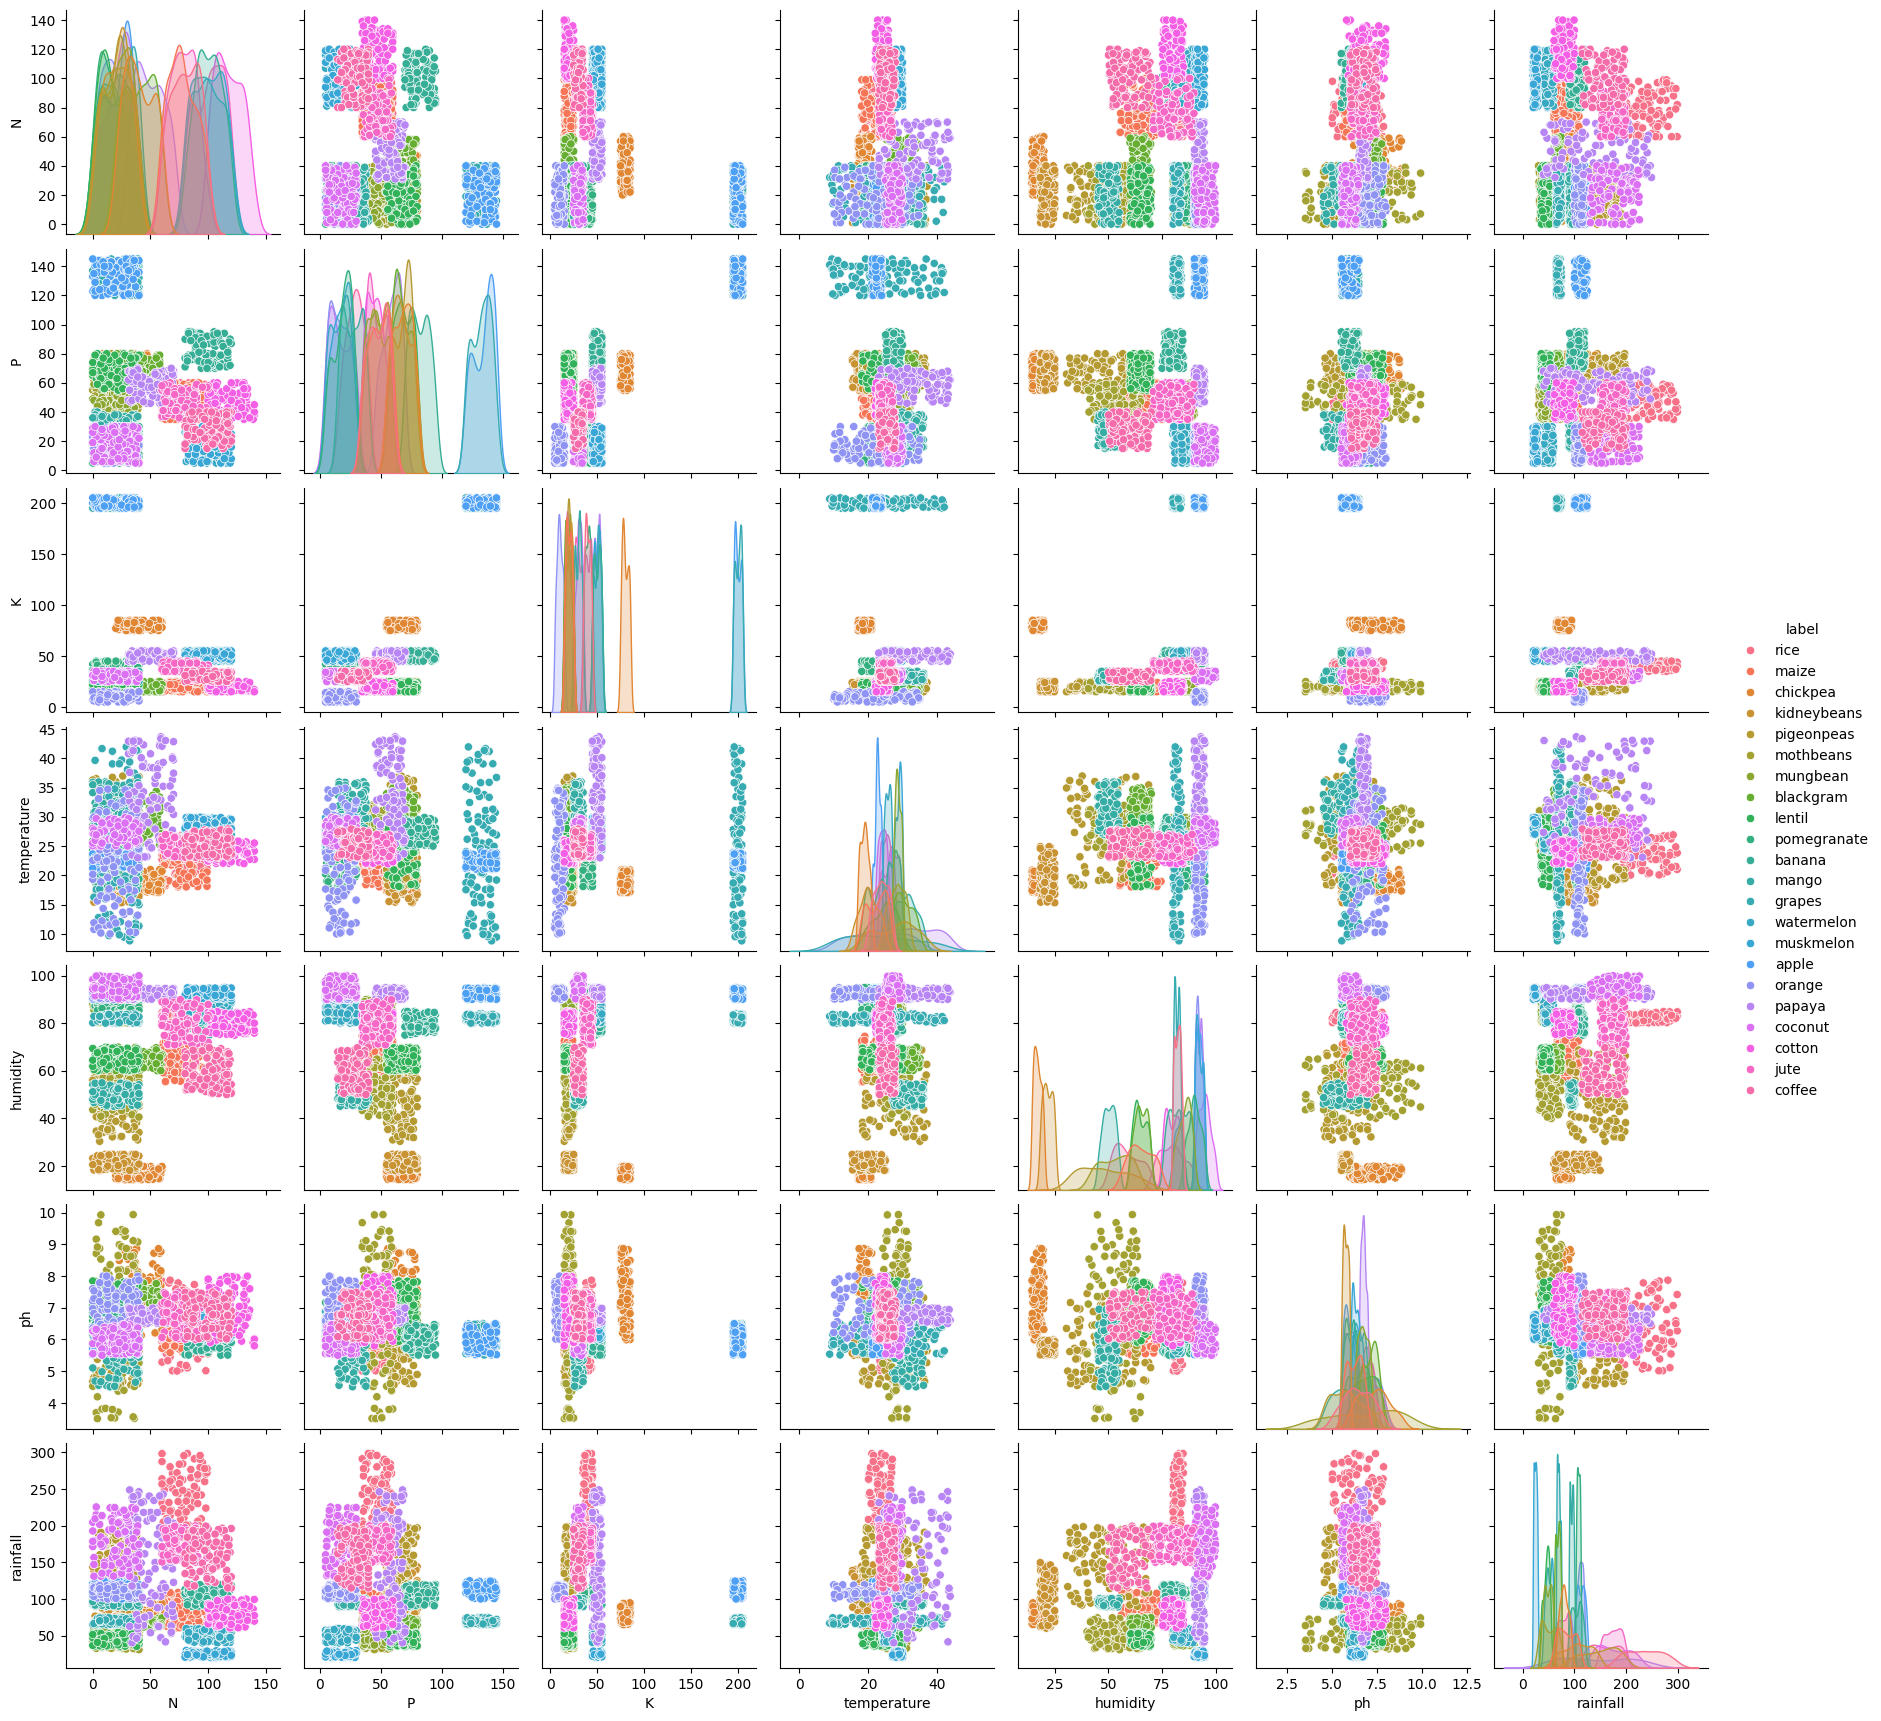

In [21]:
sns.pairplot(data=df,hue='label')
plt.show()

In [ ]:
y = df['label']
#data1 = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
sm = pd.plotting.scatter_matrix(data1, c=y, figsize=(10,10))

In [63]:
# scatter plot-> distribution of inputs with respect to the output
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print(y)


[20 20 20 ...  5  5  5]


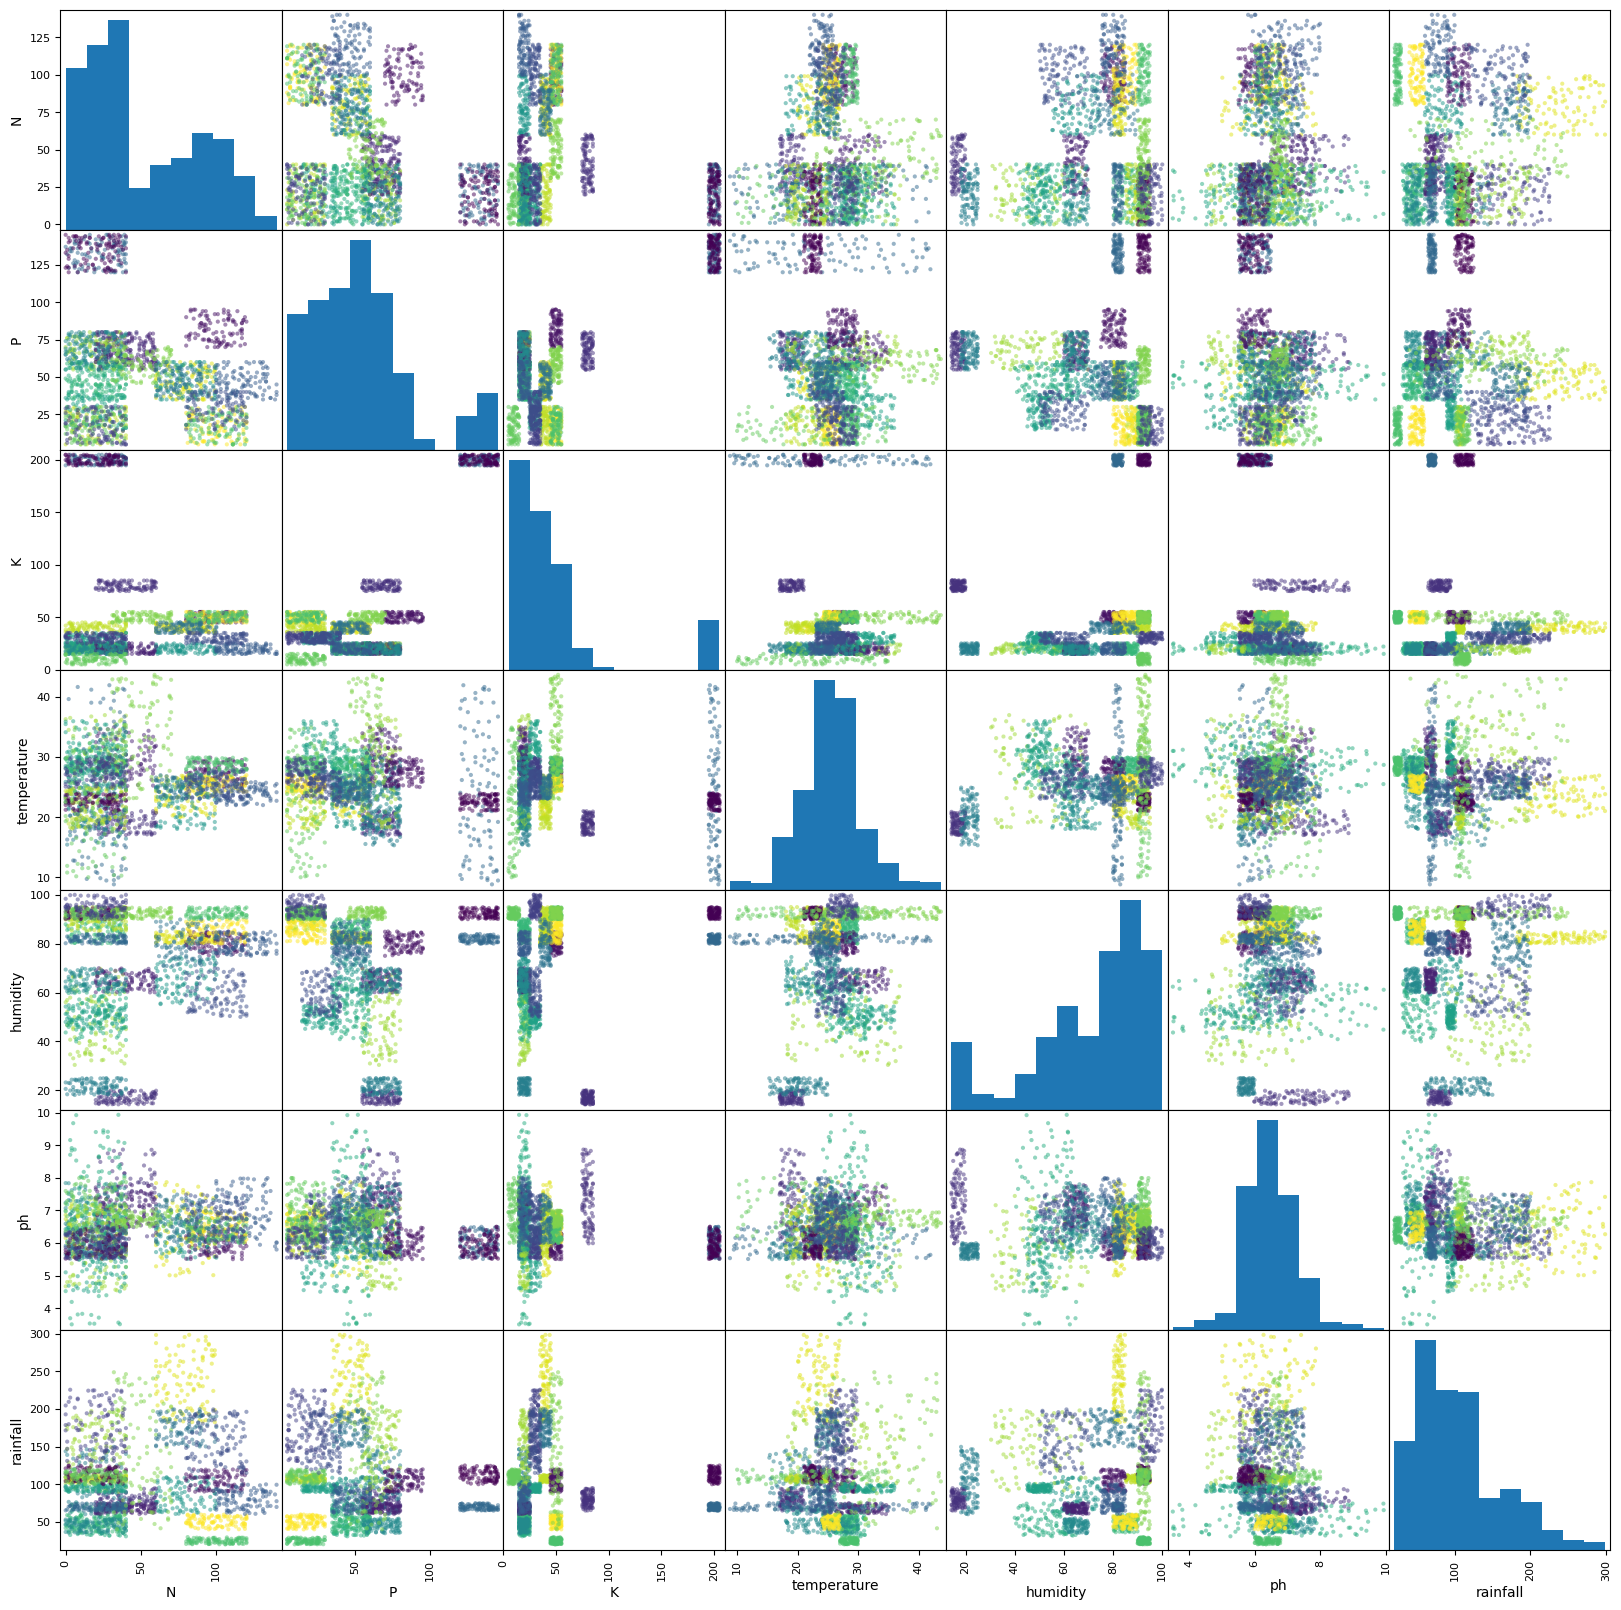

In [65]:
#y = df['label'].map(label_mapping)
sm = pd.plotting.scatter_matrix(data1, c=y, figsize=(20,20))

In [71]:
crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [67]:
#3.Prediction

In [197]:

y = df['label_encoded']
x = df.iloc[:, 0:-2]
x.head()

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [198]:

# SPLIT DATA-> training and scoring (testing is also known as SCORING)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [199]:

xtrain.head()

N   P   K  temperature   humidity        ph    rainfall
872   14  59  22    23.827235  67.898153  6.766607   46.907251
984   20  27  41    20.513435  92.516759  5.700089  110.576402
1609  13  23   6    23.961476  90.264080  7.365338  102.695870
647   35  48  15    27.108181  87.451267  6.981758   55.037240
1698  40  17  15    21.350934  90.949297  7.871063  107.086209

In [200]:
ytrain.head()

872     10
984     19
1609    16
647     14
1698    16
Name: label_encoded, dtype: int64

In [201]:

xtest.tail()

N    P    K  temperature   humidity        ph    rainfall
2150  103   33   25    27.102104  55.749733  6.911066  139.501317
689    33   37   19    27.926786  86.554320  7.183190   43.482619
956     7   23   35    19.750885  88.716912  7.054314  102.553804
1267   40  132  202    24.575584  80.706958  5.971813   69.706113
1      85   58   41    21.770462  80.319644  7.038096  226.655537

In [202]:
print(len(xtrain),len(ytrain),len(xtest),len(ytest))

1760 1760 440 440


In [203]:
# Best model choosing
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [205]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [206]:
y_pred=classifier.predict(xtest)

In [207]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, ytest)
acc.append(accuracy)
model.append('Decision Tree')
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(ytest, y_pred)))

Decision Tree Model accuracy score: 0.9818


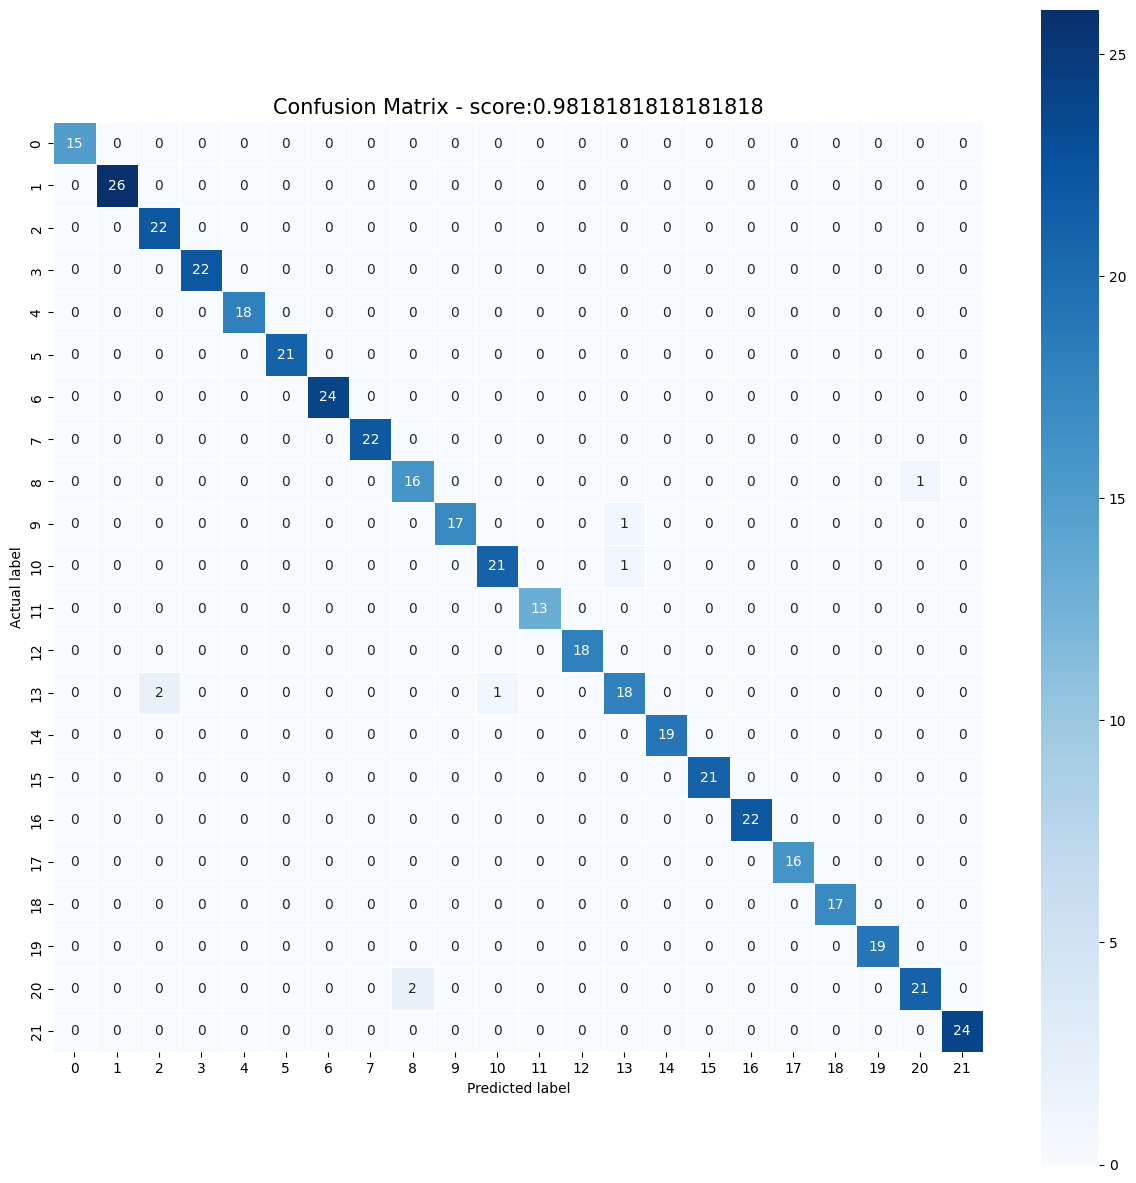

In [208]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(ytest,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [212]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        26
           2       0.92      1.00      0.96        22
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        22
           8       0.89      0.94      0.91        17
           9       1.00      0.94      0.97        18
          10       0.95      0.95      0.95        22
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        18
          13       0.90      0.86      0.88        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        22
          17       1.00    

In [213]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [214]:
y_pred= classifier_rf.predict(xtest)

In [215]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, ytest)
acc.append(accuracy)
model.append('Random Forest')
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(ytest, y_pred)))

Random Forest Model accuracy score: 0.9932


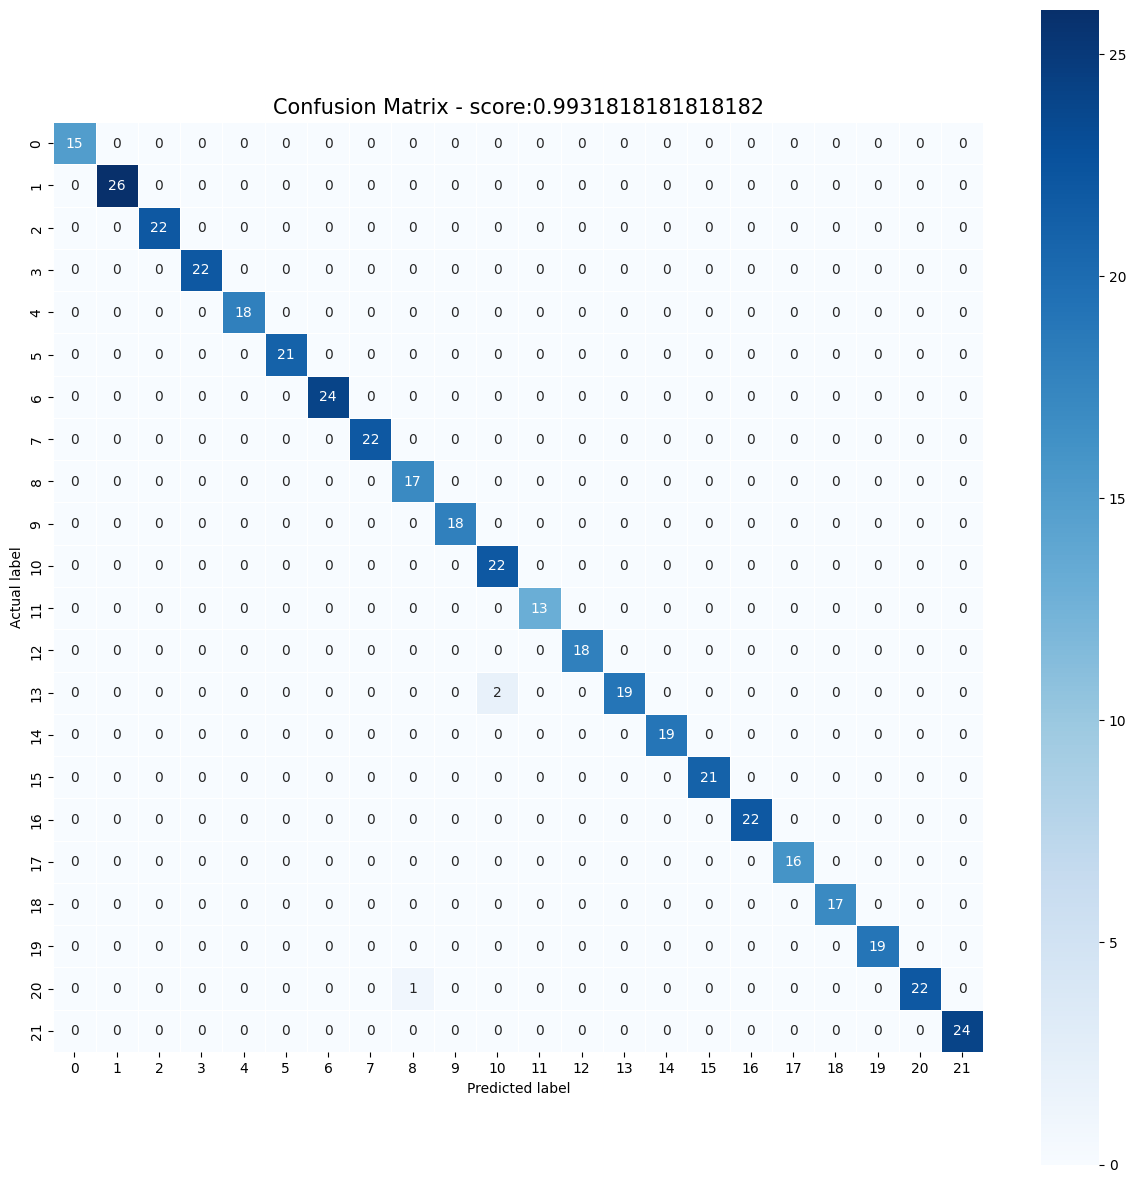

In [216]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(ytest,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [218]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        22
           8       0.94      1.00      0.97        17
           9       1.00      1.00      1.00        18
          10       0.92      1.00      0.96        22
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        18
          13       1.00      0.90      0.95        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        22
          17       1.00    

In [220]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
X_train_norm = norm.transform(xtrain)
# transform testing dataabs
X_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

SVM's Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        22
           8       0.84      0.94      0.89        17
           9       0.95      1.00      0.97        18
          10       0.95      0.95      0.95        22
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        18
          13       0.95      0.95      0.95        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.0

In [221]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9818181818181818
Random Forest --> 0.9931818181818182
SVM --> 0.9840909090909091


In [222]:
print(model)
dir(model[0])

['Decision Tree', 'Random Forest', 'SVM', 'SVM']


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# in case of trees-> we could fluctuate the depth of tree
# in case of ensembles (forests or jungles) -> we could fluctuate no. of trees

# Hyperparameters-> values that we adjust from our side as AI/ML engineers
# -> ASSUMPTIONS from our end
# -> these adjustments result in different models out of same algorithms!

my_algos = {
    "DecisionTree100": DecisionTreeClassifier(max_depth=100),
    "DecisionTree10": DecisionTreeClassifier(max_depth=10),
    "DecisionTree200": DecisionTreeClassifier(max_depth=200),
    "DecisionTree50": DecisionTreeClassifier(max_depth=50),
    "RandomForest10": RandomForestClassifier(n_estimators=10),
    "RandomForest100": RandomForestClassifier(n_estimators=100),
    "RandomForest200": RandomForestClassifier(n_estimators=200),
    "RandomForest300": RandomForestClassifier(n_estimators=300),
    "KNN" : KNeighborsClassifier(),
    "Sherlock" : GaussianNB(),
    "Support Vector Machine with linear" : SVC(kernel='linear'),
    "Support Vector Machines with RBF": SVC(kernel='rbf')
}

In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store the metrics
all_accs = []
all_precisions = []
all_recalls = []
all_f1_scores = []

# Assuming you have defined best_acc, best_precision, best_f1, and best_recall
best_acc = float('-inf')
best_precision = float('-inf')
best_f1 = float('-inf')
best_recall = float('-inf')

best_model_acc = None
best_model_name_acc = None
best_model_f1 = None
best_model_name_f1 = None
best_model_p = None
best_model_name_p = None
best_model_r = None
best_model_name_r = None

# Define the average method for multiclass
average_method = 'weighted'  # Can be 'micro', 'macro', or 'weighted'

# Loop through the algorithms
for algo_name, algo in my_algos.items():
    print('Algorithm considered = ' + algo_name)

    # Fit the model
    model = algo
    model.fit(xtrain, ytrain)

    # Predict with the fitted model
    p = model.predict(xtest)

    # Calculate metrics
    a_score = accuracy_score(ytest, p)
    p_score = precision_score(ytest, p, average=average_method)
    r_score = recall_score(ytest, p, average=average_method)
    f_score = f1_score(ytest, p, average=average_method)

    # Append metrics to the lists
    all_accs.append(a_score)
    all_precisions.append(p_score)
    all_recalls.append(r_score)
    all_f1_scores.append(f_score)

    # Print the metrics
    print('Accuracy = ' + str(a_score))
    print('Precision = ' + str(p_score))
    print('Recall = ' + str(r_score))
    print('F1 Score = ' + str(f_score))

    # Select the best model based on each metric
    if a_score > best_acc:
        best_acc = a_score
        best_model_acc = algo
        best_model_name_acc = algo_name
    if f_score > best_f1:
        best_f1 = f_score
        best_model_f1 = algo
        best_model_name_f1 = algo_name
    if p_score > best_precision:
        best_precision = p_score
        best_model_p = algo
        best_model_name_p = algo_name
    if r_score > best_recall:
        best_recall = r_score
        best_model_r = algo
        best_model_name_r = algo_name

Algorithm considered = DecisionTree100
Accuracy = 0.9727272727272728
Precision = 0.9734637310427825
Recall = 0.9727272727272728
F1 Score = 0.9726835212591027
Algorithm considered = DecisionTree10
Accuracy = 0.9795454545454545
Precision = 0.9805032467532467
Recall = 0.9795454545454545
F1 Score = 0.9794121217615016
Algorithm considered = DecisionTree200
Accuracy = 0.9727272727272728
Precision = 0.9735164319650486
Recall = 0.9727272727272728
F1 Score = 0.9726185020318352
Algorithm considered = DecisionTree50
Accuracy = 0.9772727272727273
Precision = 0.9774031249821763
Recall = 0.9772727272727273
F1 Score = 0.9771802745058559
Algorithm considered = RandomForest10
Accuracy = 0.9931818181818182
Precision = 0.9937635928664638
Recall = 0.9931818181818182
F1 Score = 0.9932047750229568
Algorithm considered = RandomForest100
Accuracy = 0.9931818181818182
Precision = 0.9937635928664638
Recall = 0.9931818181818182
F1 Score = 0.9932047750229568
Algorithm considered = RandomForest200
Accuracy = 0.995

In [226]:
best_model_name_acc


'RandomForest200'

In [227]:
best_model_name_f1


'RandomForest200'

In [228]:
best_model_name_p


'RandomForest200'

In [229]:
best_model_name_r

'RandomForest200'

In [230]:
dir(best_model_acc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_params',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimato

In [231]:
best_model_acc.predict(xtest)

array([ 1,  3,  0, 18, 16, 17,  5,  1, 14, 17, 21, 21, 15, 18, 10, 17,  2,
       15,  3, 13,  6, 10, 20, 21,  0, 20,  9,  9,  1,  3, 13,  1, 10,  8,
       11, 12,  0,  7,  6, 13,  8, 20, 16, 21, 15,  4,  9, 15, 12, 16, 21,
        3,  8,  2, 15,  3, 13,  9,  4,  8, 15, 18,  6, 13,  6, 21, 15, 12,
       21, 19, 19, 20, 17,  7, 16,  2,  2,  5, 20, 16, 20,  6,  5, 17,  8,
       10, 16, 21, 21,  2, 10,  6,  6, 12, 21, 17,  2,  3, 15, 16, 11, 18,
        6,  7,  8,  2, 21, 17,  0, 13, 12, 18,  6,  7,  5,  4, 15,  5,  3,
        6,  5, 16, 15,  5, 12,  2, 16,  1,  8,  8,  5,  0, 15,  4, 21,  9,
       16, 13,  1, 15, 20,  1,  9,  0, 10,  5, 18, 13, 16, 13,  4,  3,  8,
       11, 10, 14, 12,  7,  1,  1,  9, 17, 14, 14, 13, 18, 19, 16, 10, 11,
        2,  7,  0,  1, 13, 13, 17, 11, 10,  0, 13,  7, 12,  2, 18, 19,  3,
       11,  1, 10,  5,  5,  2,  6,  5, 10, 14, 13, 10, 10,  4, 16,  4,  8,
       10, 20,  1, 20, 10, 14,  3,  3,  7, 21, 11,  3,  7, 19,  2,  5, 18,
        1,  7,  4, 21, 15

In [232]:
xtrain.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [235]:
all_coef = best_model_acc
all_columns = xtrain.columns
all_columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [238]:
dir(best_model_acc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_params',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimato

In [240]:
import pickle
pickle.dump(best_model_acc, open("model.best", 'wb'))

In [241]:
loaded_model = pickle.load(open("model.best", 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.9954545454545455


In [242]:
loaded_model.predict(xtest)

array([ 1,  3,  0, 18, 16, 17,  5,  1, 14, 17, 21, 21, 15, 18, 10, 17,  2,
       15,  3, 13,  6, 10, 20, 21,  0, 20,  9,  9,  1,  3, 13,  1, 10,  8,
       11, 12,  0,  7,  6, 13,  8, 20, 16, 21, 15,  4,  9, 15, 12, 16, 21,
        3,  8,  2, 15,  3, 13,  9,  4,  8, 15, 18,  6, 13,  6, 21, 15, 12,
       21, 19, 19, 20, 17,  7, 16,  2,  2,  5, 20, 16, 20,  6,  5, 17,  8,
       10, 16, 21, 21,  2, 10,  6,  6, 12, 21, 17,  2,  3, 15, 16, 11, 18,
        6,  7,  8,  2, 21, 17,  0, 13, 12, 18,  6,  7,  5,  4, 15,  5,  3,
        6,  5, 16, 15,  5, 12,  2, 16,  1,  8,  8,  5,  0, 15,  4, 21,  9,
       16, 13,  1, 15, 20,  1,  9,  0, 10,  5, 18, 13, 16, 13,  4,  3,  8,
       11, 10, 14, 12,  7,  1,  1,  9, 17, 14, 14, 13, 18, 19, 16, 10, 11,
        2,  7,  0,  1, 13, 13, 17, 11, 10,  0, 13,  7, 12,  2, 18, 19,  3,
       11,  1, 10,  5,  5,  2,  6,  5, 10, 14, 13, 10, 10,  4, 16,  4,  8,
       10, 20,  1, 20, 10, 14,  3,  3,  7, 21, 11,  3,  7, 19,  2,  5, 18,
        1,  7,  4, 21, 15